                                             Air Quality Index
Task


1)To identify the Most polluted City


2)Create a Model to Predict the quality of air

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory



Features
 -->City
-->Date
-->PM2.5 (Particulate Matter 2.5-micrometer)
-->PM10 (Particulate Matter 10-micrometer)
-->SO2 (Sulphur Dioxide)
-->NOx (Any Nitric x-oxide)
-->NH3 (Ammonia)
-->CO (Carbon Monoxide)
-->O3 (Ozone or Trioxygen)
-->Benzene
-->Toluene
-->Xylene
-->AQI
-->AQI_Bucket --> 

<Axes: >

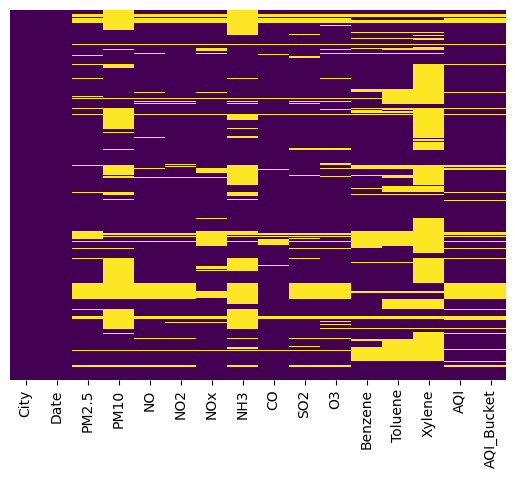

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print(df.isnull().sum())


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [6]:
df["AQI"].value_counts()

AQI
102.0     223
100.0     222
70.0      208
106.0     208
78.0      198
         ... 
1044.0      1
679.0       1
1222.0      1
1459.0      1
13.0        1
Name: count, Length: 829, dtype: int64

Filling the Nan values present in the pollutants with mean 

In [7]:
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

In [8]:
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

In [9]:
nmean=df["NO"].mean()
df["NO"].fillna(nmean,inplace=True)

In [10]:
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

In [11]:
noxmean=df["NOx"].mean()
df["NOx"].fillna(noxmean,inplace=True)

In [12]:
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

In [13]:
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

In [14]:
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

In [15]:
omean=df["O3"].mean()
df["O3"].fillna(omean, inplace=True)

In [16]:
bmean=df["Benzene"].mean()
df["Benzene"].fillna(bmean,inplace=True)

In [17]:
tmean=df["Toluene"].mean()
df["Toluene"].fillna(tmean,inplace=True)

In [18]:
xmean=df["Xylene"].mean()
df["Xylene"].fillna(xmean,inplace=True)

In [19]:
df.isna().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

<Axes: >

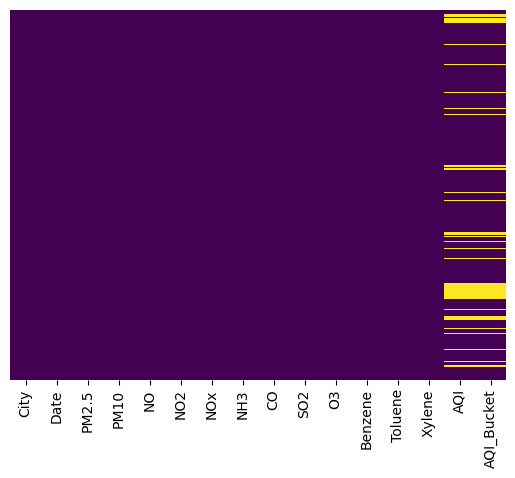

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
x=df.iloc[:,2:13].values
y=df.iloc[:,-1].values

In [22]:
x

array([[6.74505779e+01, 1.18127103e+02, 9.20000000e-01, ...,
        1.33360000e+02, 0.00000000e+00, 2.00000000e-02],
       [6.74505779e+01, 1.18127103e+02, 9.70000000e-01, ...,
        3.40600000e+01, 3.68000000e+00, 5.50000000e+00],
       [6.74505779e+01, 1.18127103e+02, 1.74000000e+01, ...,
        3.07000000e+01, 6.80000000e+00, 1.64000000e+01],
       ...,
       [2.29100000e+01, 6.57300000e+01, 3.45000000e+00, ...,
        3.09600000e+01, 1.00000000e-02, 1.00000000e-02],
       [1.66400000e+01, 4.99700000e+01, 4.05000000e+00, ...,
        2.83000000e+01, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+01, 6.60000000e+01, 4.00000000e-01, ...,
        1.70500000e+01, 3.28084030e+00, 8.70097208e+00]])

The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
-->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

-->For CO and O3 the maximum value in last 8-hrs is used.

-->Each measure is converted into a Sub-Index based on pre-defined groups.

-->Sometimes measures are not available due to lack of measuring or lack of required data points.

-->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

calculating Sub-Index

# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [24]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))


<Axes: >

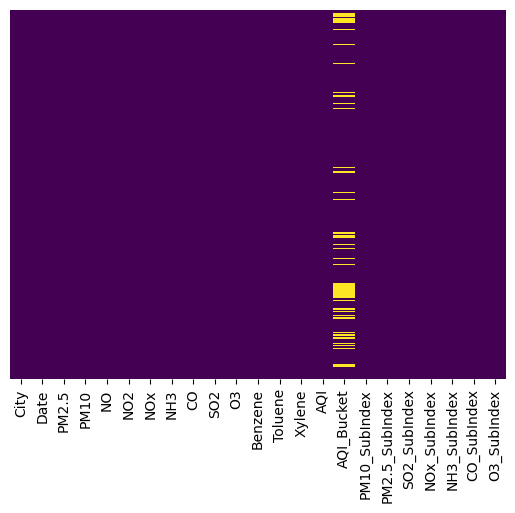

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

AQI Bucket

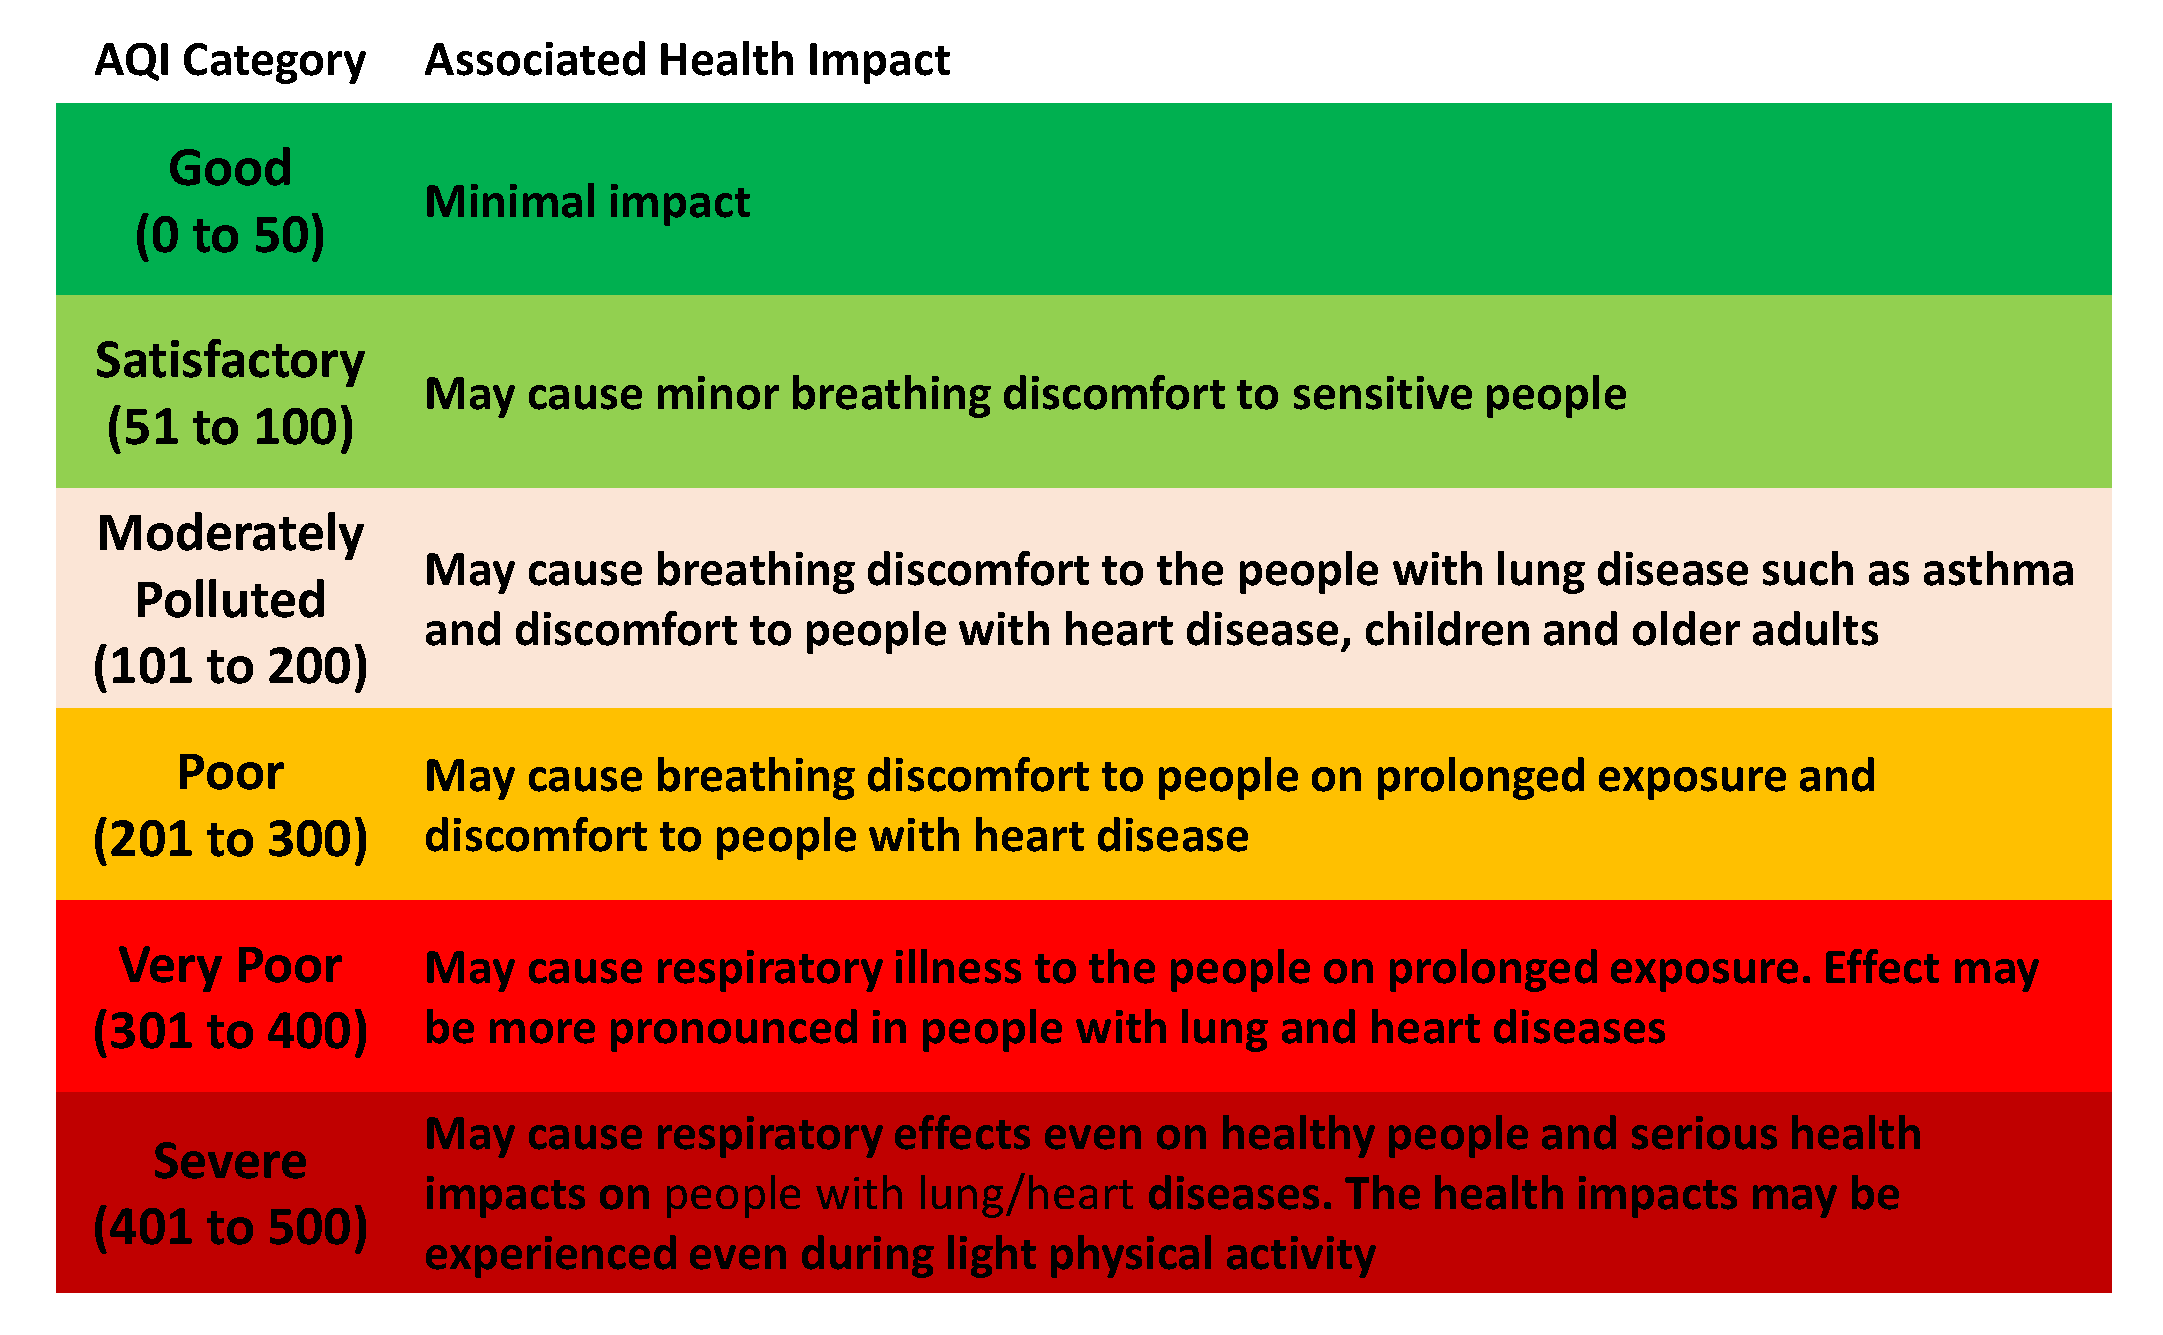

In [26]:
from IPython import display 
display.Image("AQI.png",width = 400, height = 200)

calculating AQI bucket and filling the NAN value present

In [27]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [28]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,0.000000,149.0,Moderate,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,3.770000,123.0,Moderate,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,2.250000,300.0,Poor,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,1.000000,123.0,Moderate,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,2.780000,329.0,Very Poor,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.0,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.0,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.0,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.0,Satisfactory,49.0,26.666667,11.25,22.50,2.50,0.000000,28.000000


<Axes: >

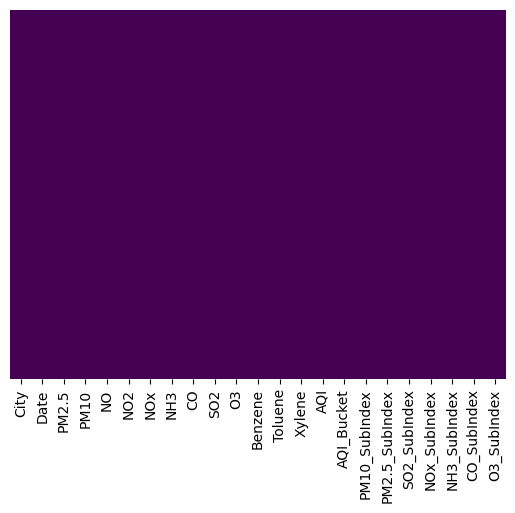

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex',
       'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [31]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex',
       'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

Distribution of different pollutants in last 5 years


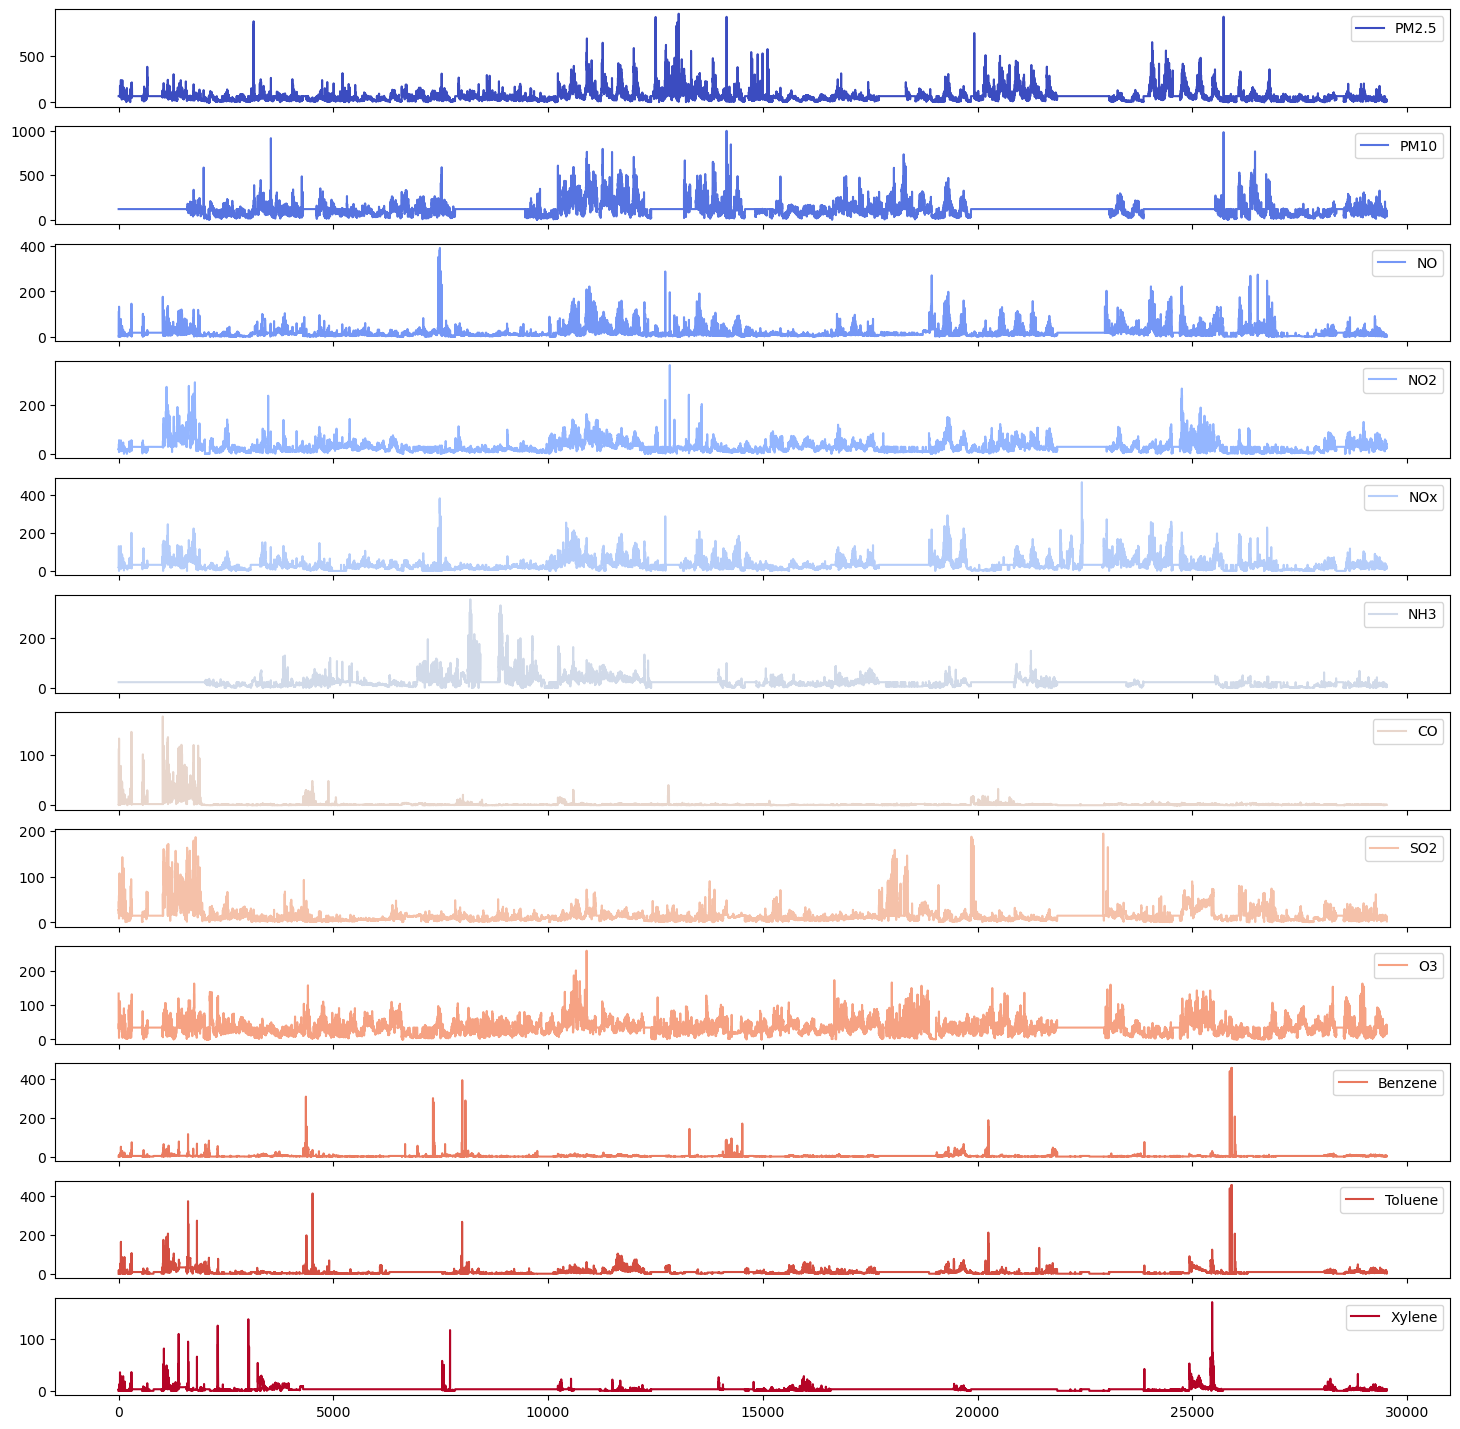

In [32]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

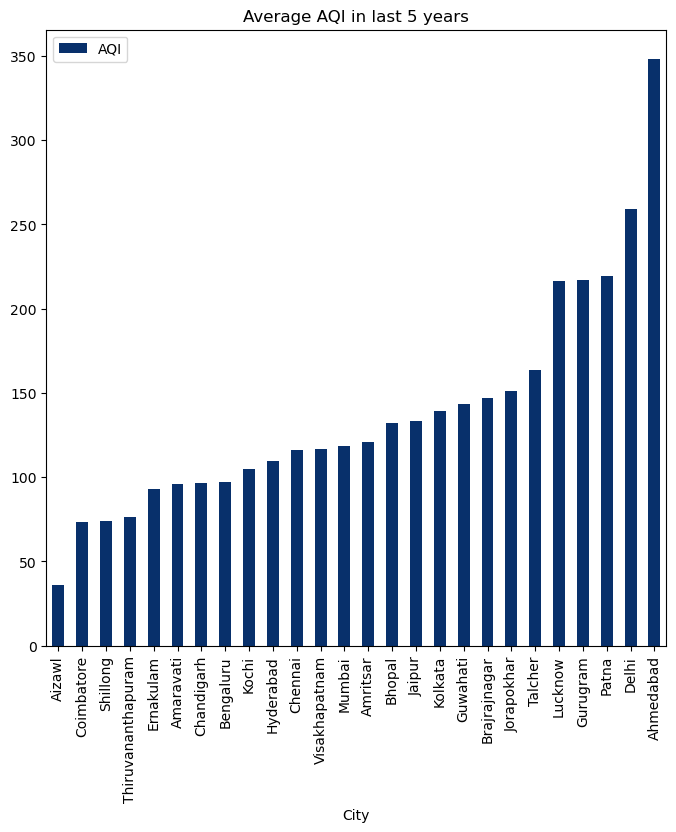

In [33]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

By above graph we can conclude that Ahmedabad is the heighest polluted city followed by Delhi and Gurugram
Creating Model for predicting the Output

In [34]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
0,149.0,Moderate
1,123.0,Moderate
2,300.0,Poor
3,123.0,Moderate
4,329.0,Very Poor
...,...,...
29526,41.0,Good
29527,70.0,Satisfactory
29528,68.0,Satisfactory
29529,54.0,Satisfactory


In [35]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [36]:
#final_df = pd.get_dummies(final_df)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
0,149.0,2
1,123.0,2
2,300.0,3
3,123.0,2
4,329.0,4


Predicting the values of AQI_Bucket w.r.t values of AQI using Random Forest Classifier

In [37]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [39]:
print("Enter the value of AQI:")
AQI = float(input("AQI : "))
output = clf.predict([[AQI]])
output
#0-->Good
#1-->Satisfactory
#2-->moderate
#3-->poor
#4-->Very poor
#5-->Severe

Enter the value of AQI:
AQI : 110


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00      2043
           2       1.00      1.00      1.00      3274
           3       1.00      1.00      1.00       757
           4       1.00      1.00      1.00       621
           5       1.00      1.00      1.00       324

    accuracy                           1.00      7383
   macro avg       1.00      1.00      1.00      7383
weighted avg       1.00      1.00      1.00      7383

[[ 364    0    0    0    0    0]
 [   0 2043    0    0    0    0]
 [   0    0 3274    0    0    0]
 [   0    0    0  757    0    0]
 [   0    0    0    0  621    0]
 [   0    0    0    0    0  324]]
